In [15]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
from torch_geometric.datasets import KarateClub
from torch_geometric.data import Data

dataset = KarateClub()

In [3]:
class GCN(torch.nn.Module):
    def __init__(self, ) -> None:
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()

        out = self.classifier(h)

        return out, h
    
model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


In [4]:
from torch_geometric.utils import to_networkx
G = to_networkx(dataset[0], to_undirected=True)
import networkx as nx
import matplotlib.pyplot as plt


def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()


def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()

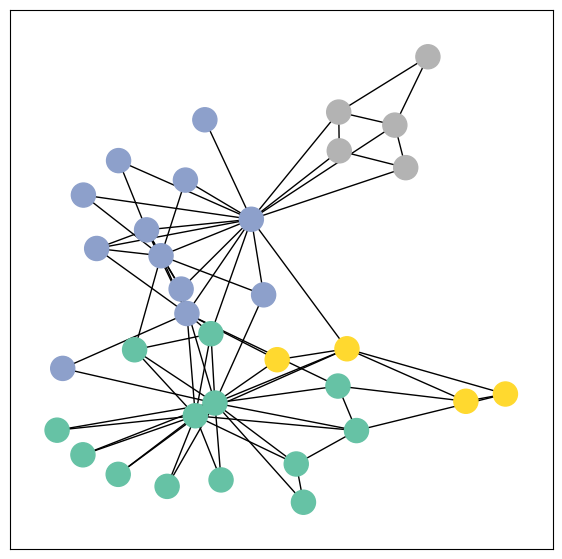

In [6]:
visualize_graph(G, color=dataset[0].y)

In [8]:
model = GCN()
_, h = model(dataset[0].x, dataset[0].edge_index)

In [10]:
print(h.shape)

torch.Size([34, 2])


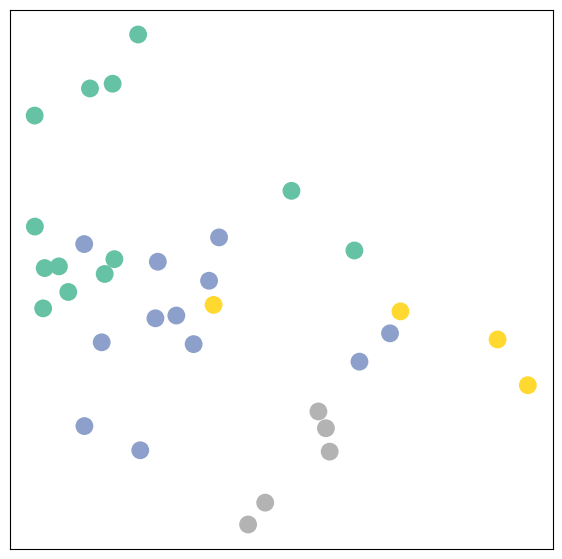

In [12]:
visualize_embedding(h,color=dataset[0].y)

In [13]:
import time
model = GCN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

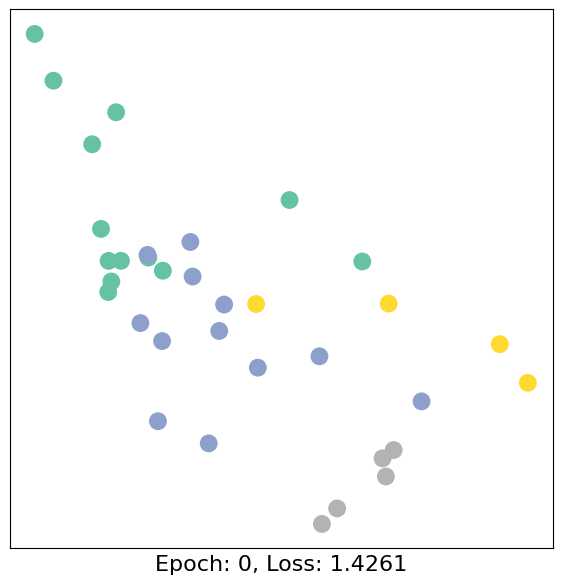

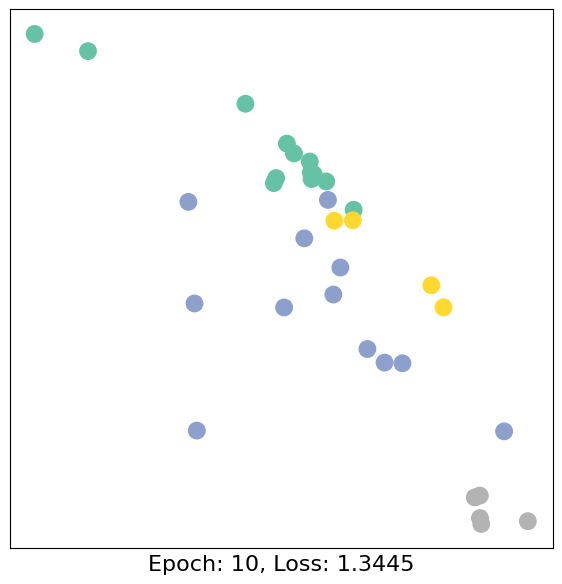

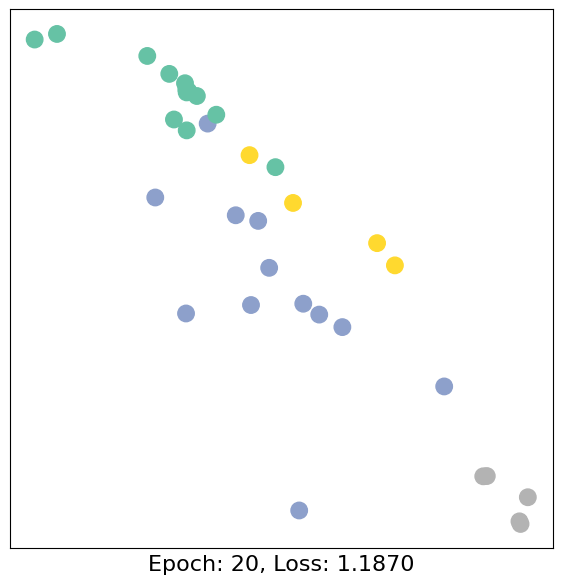

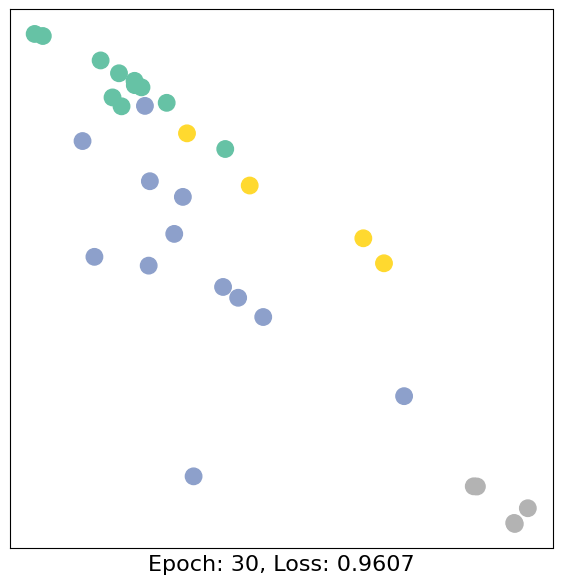

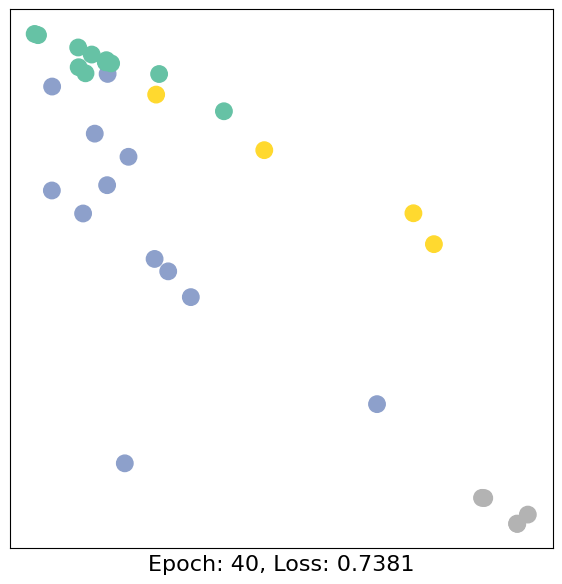

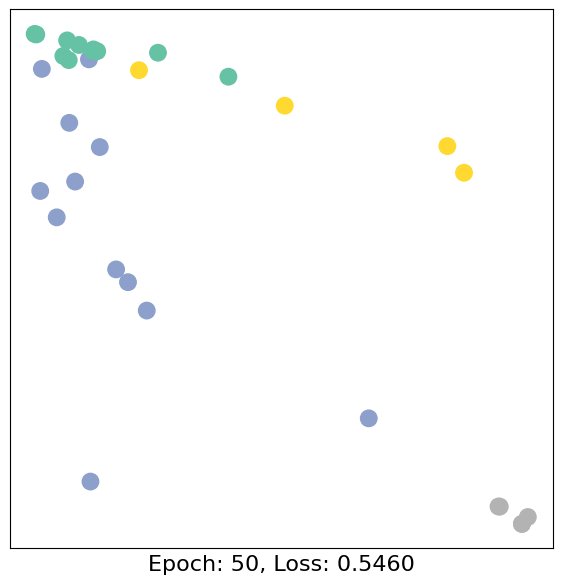

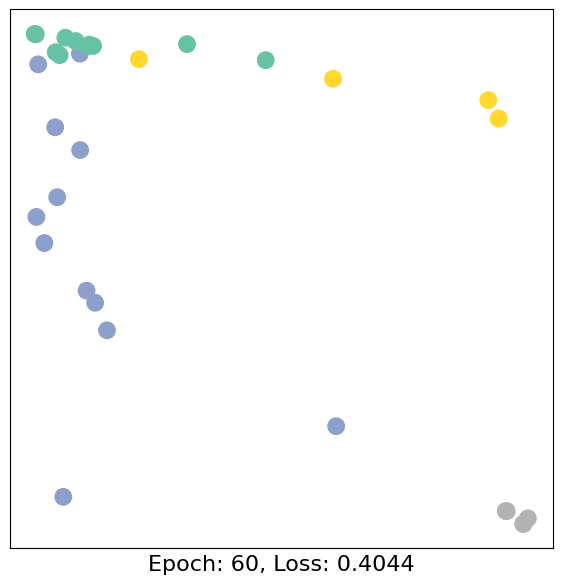

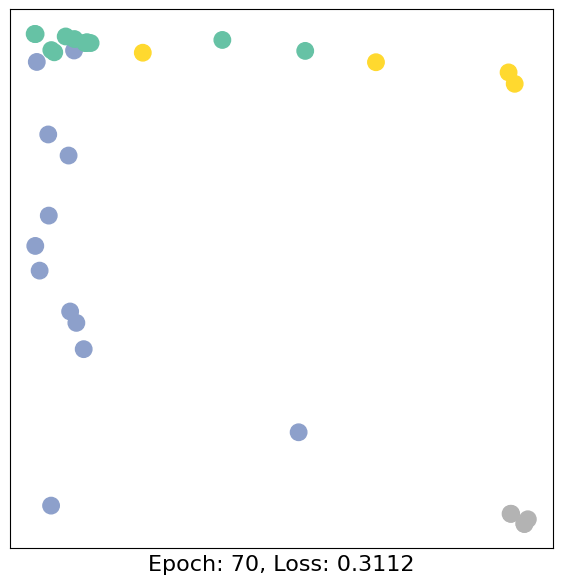

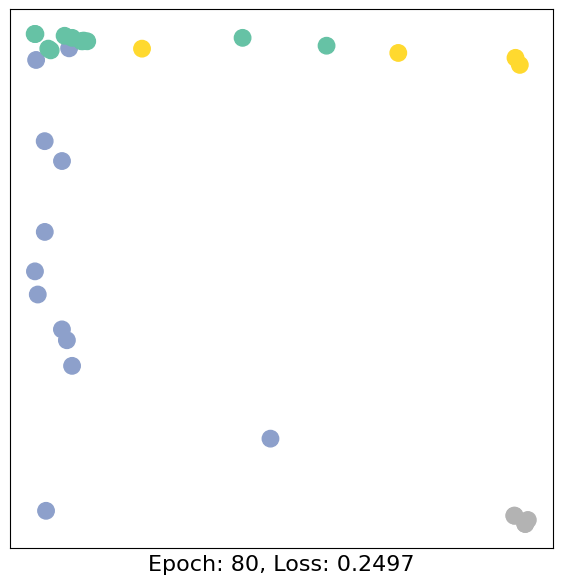

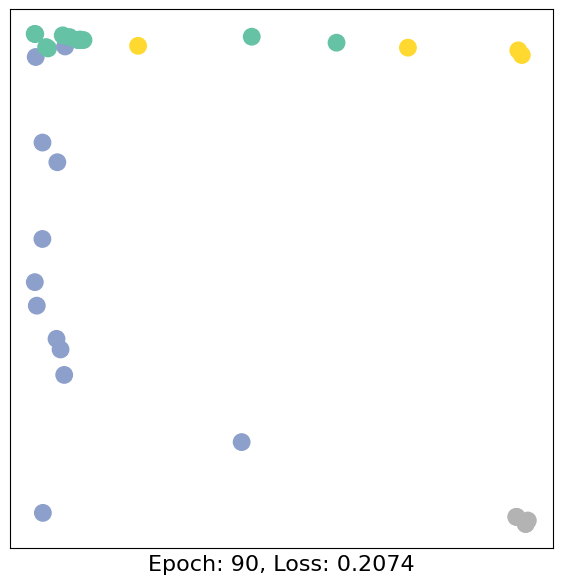

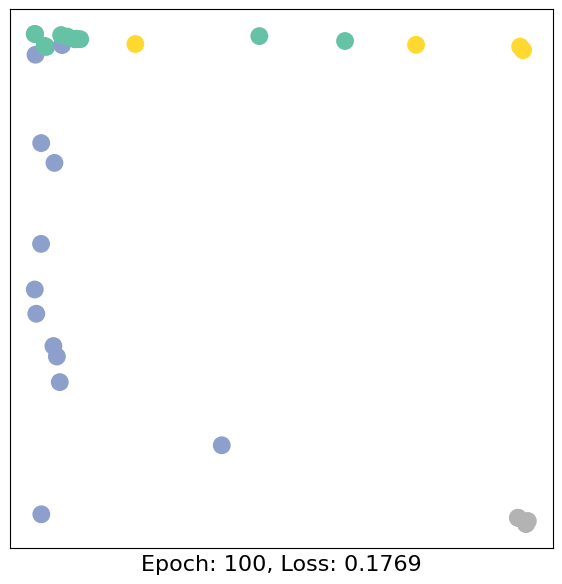

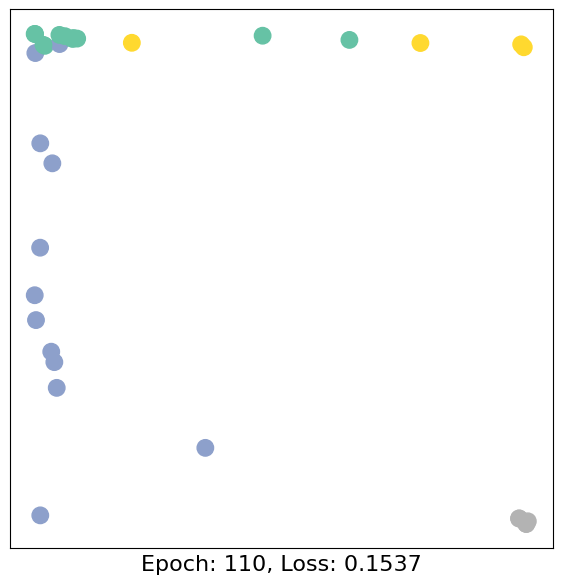

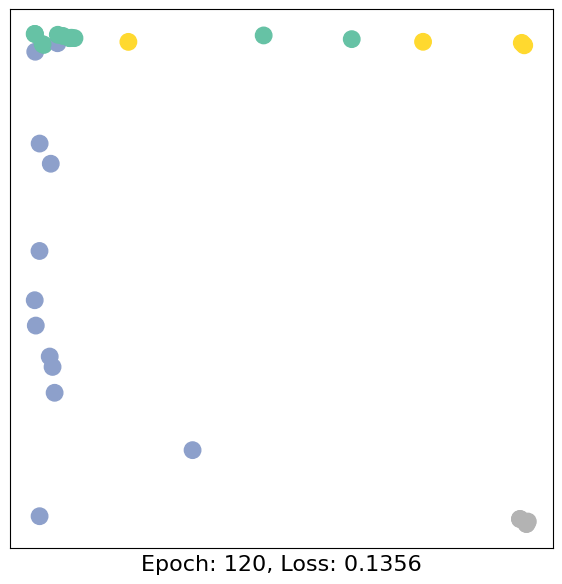

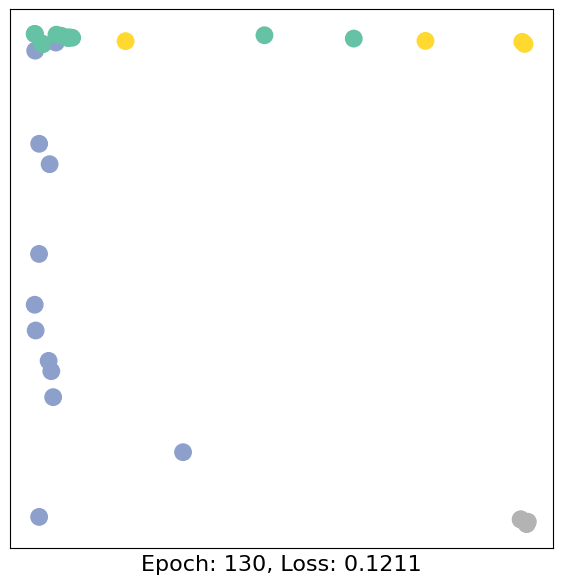

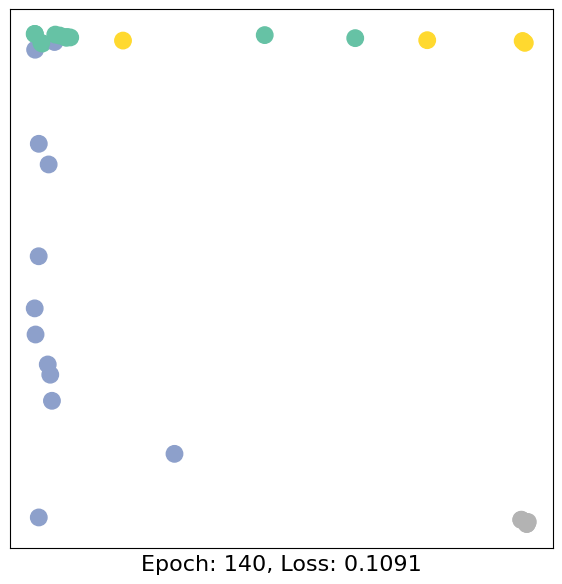

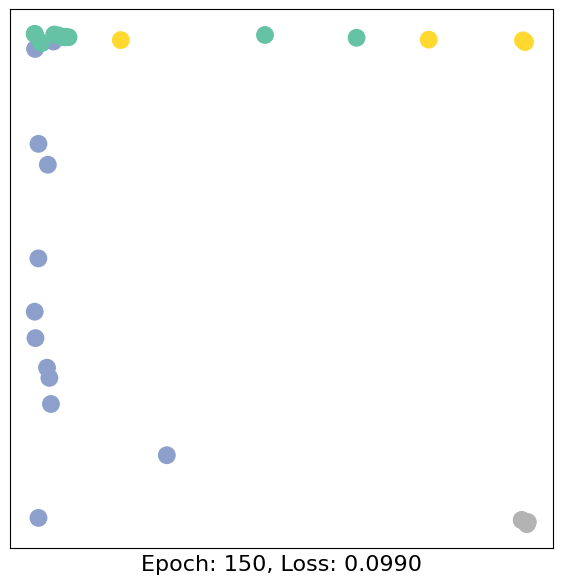

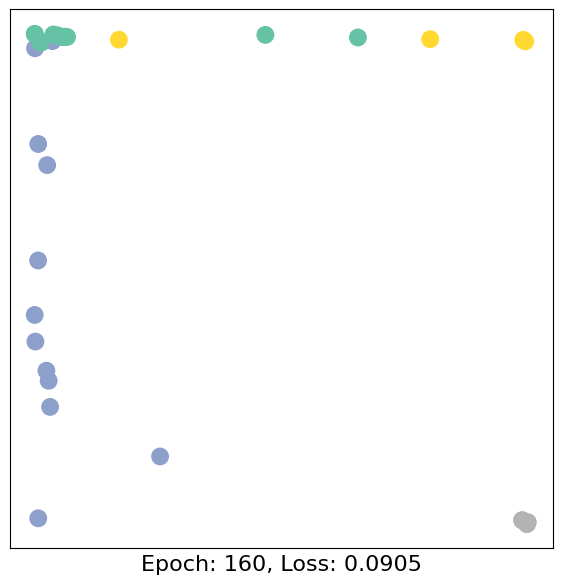

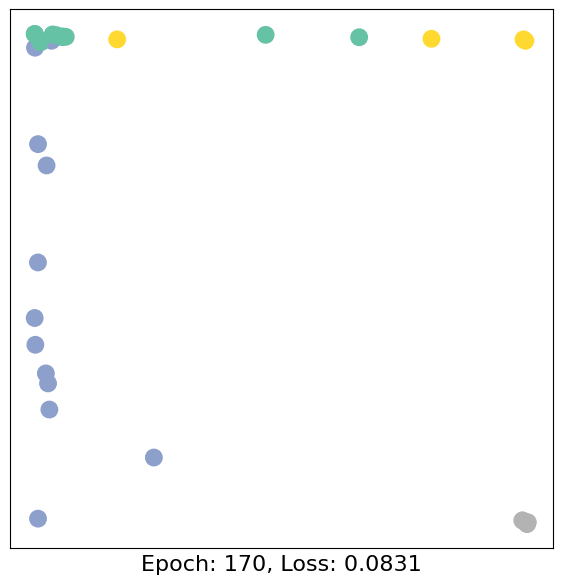

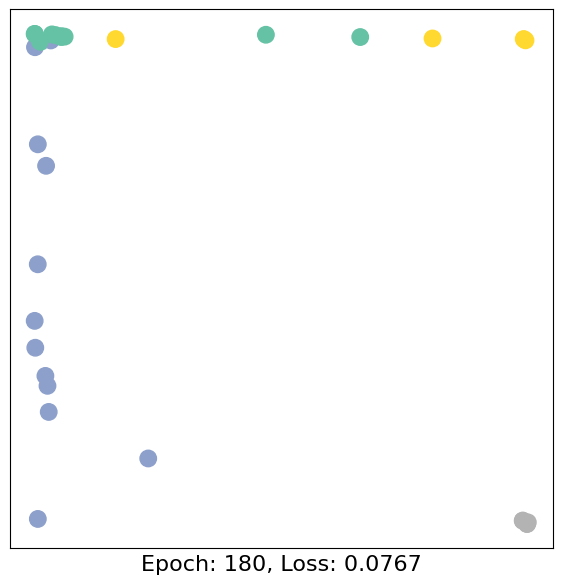

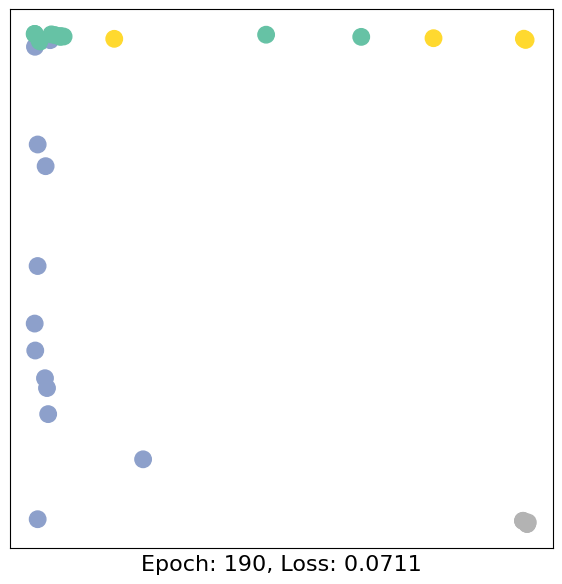

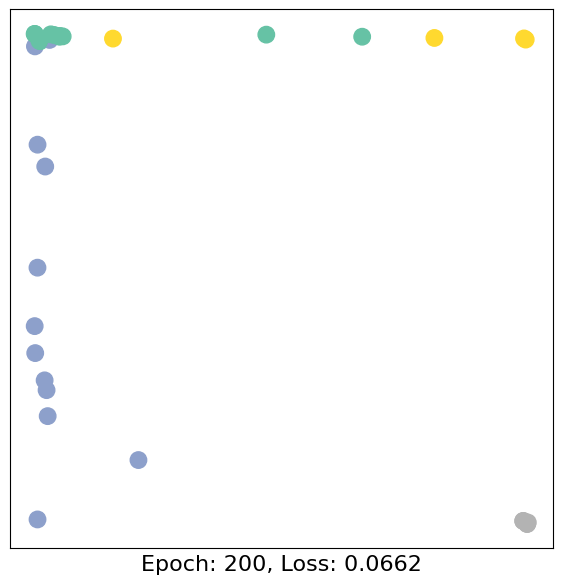

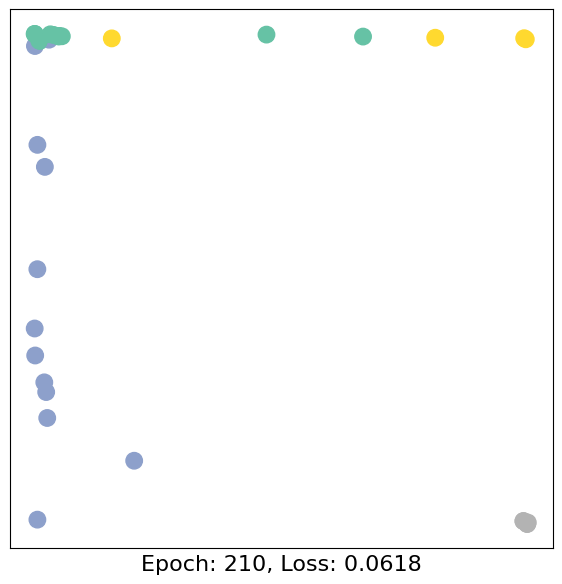

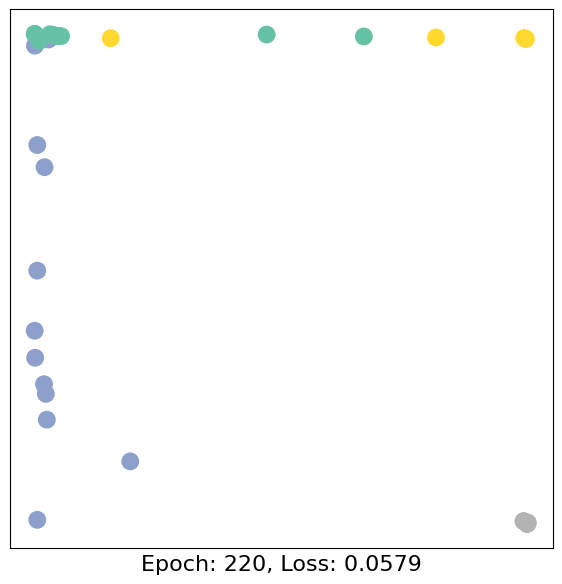

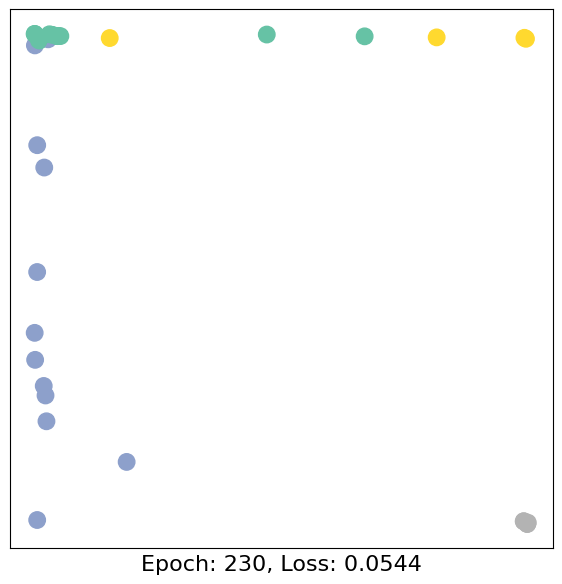

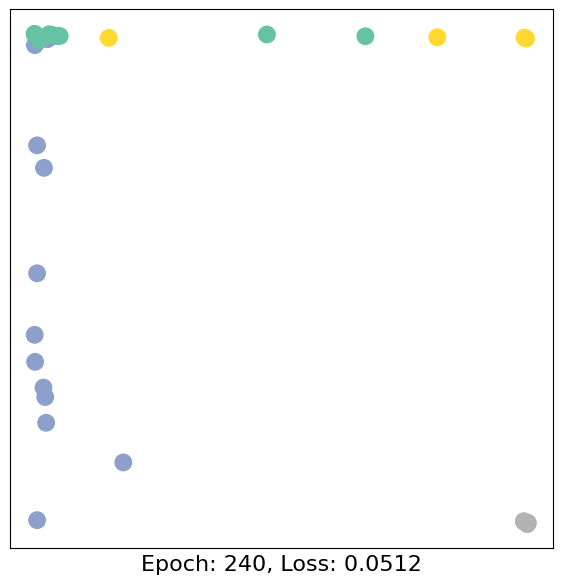

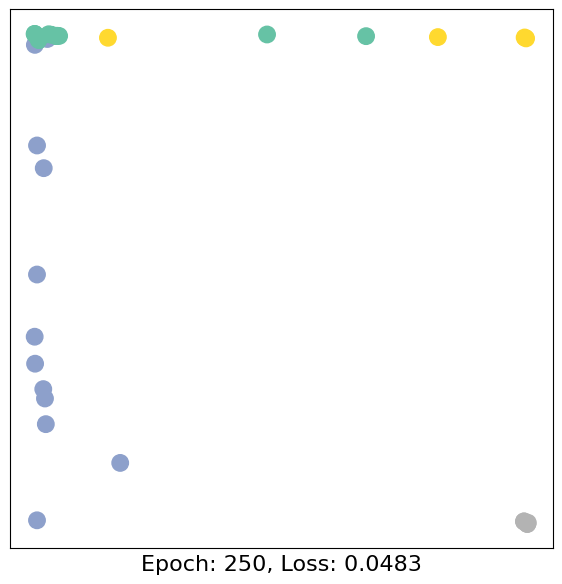

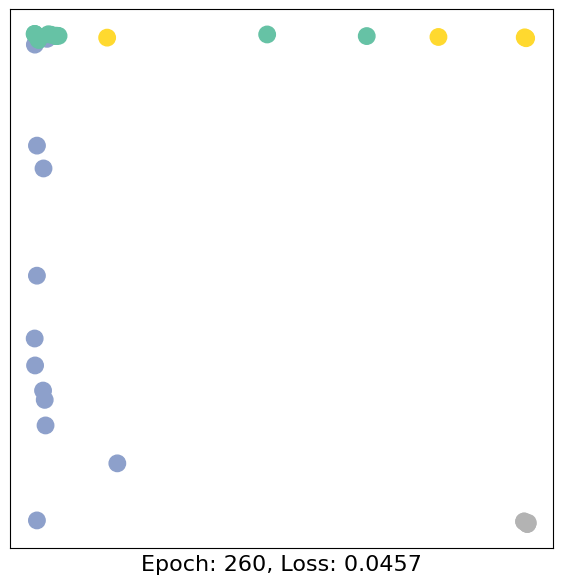

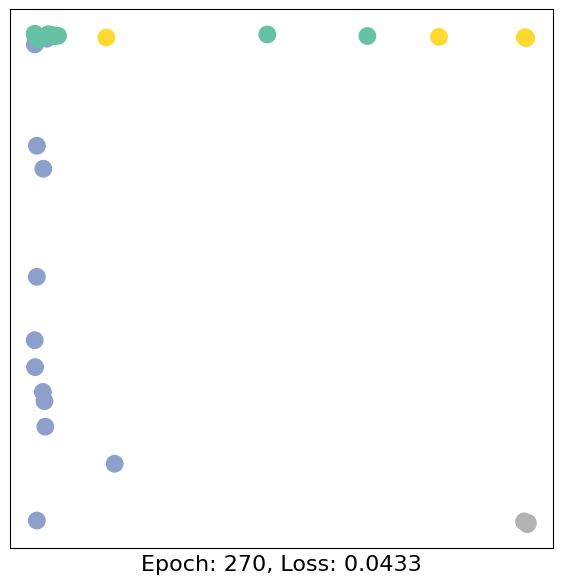

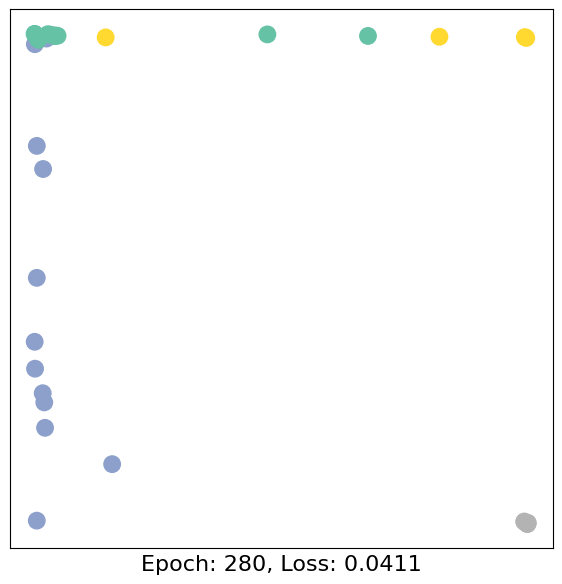

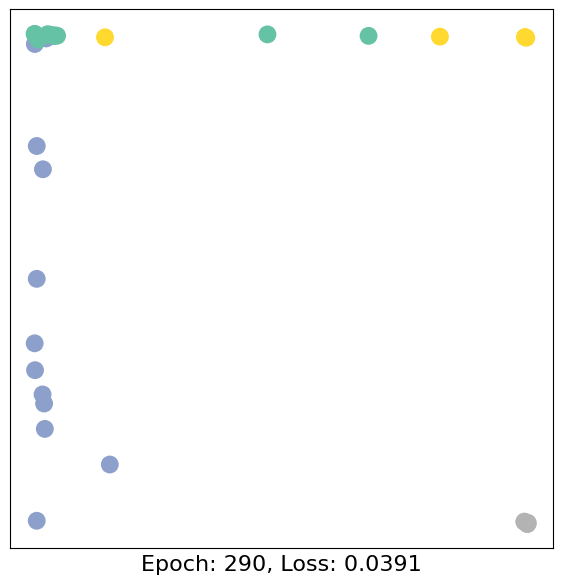

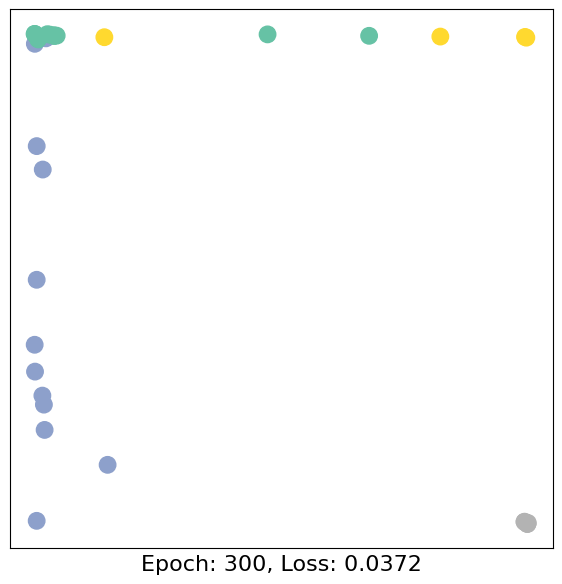

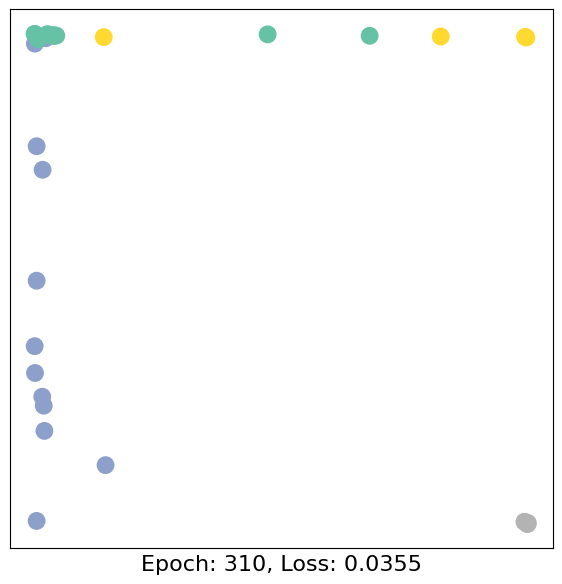

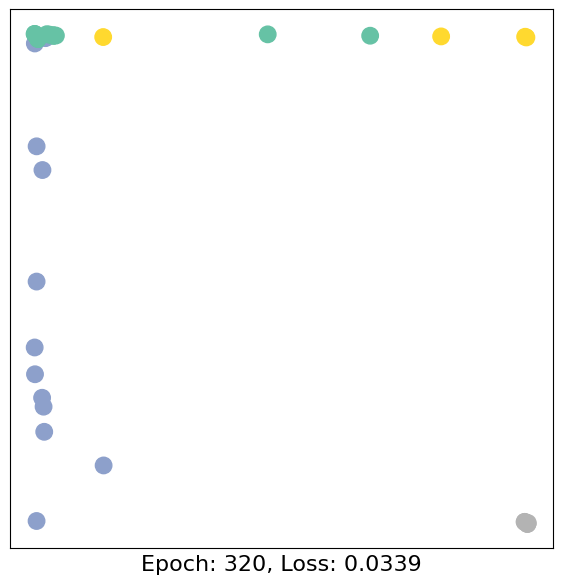

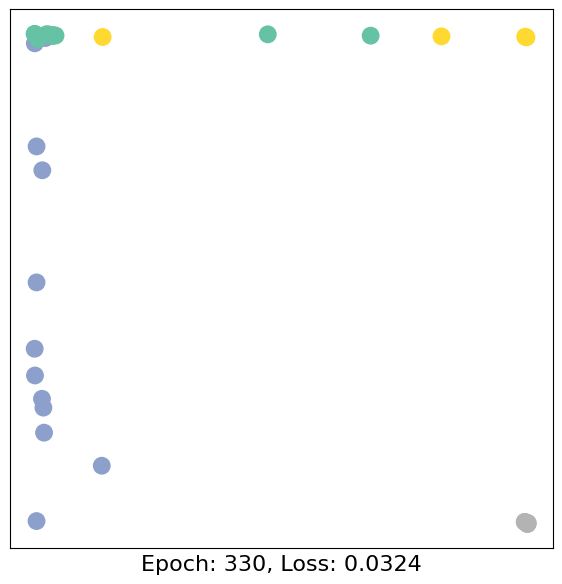

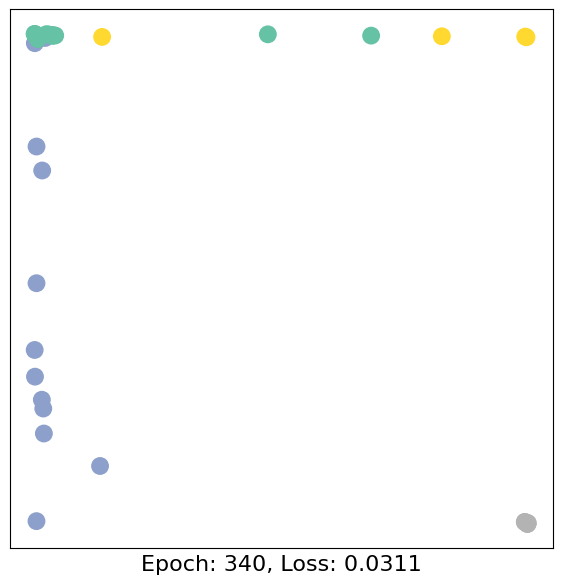

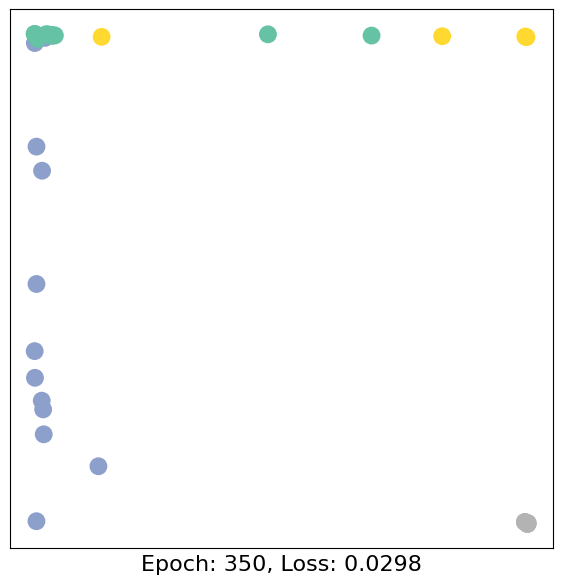

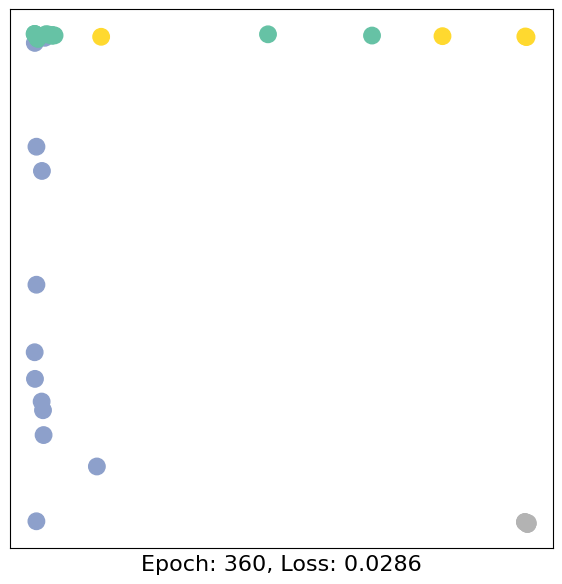

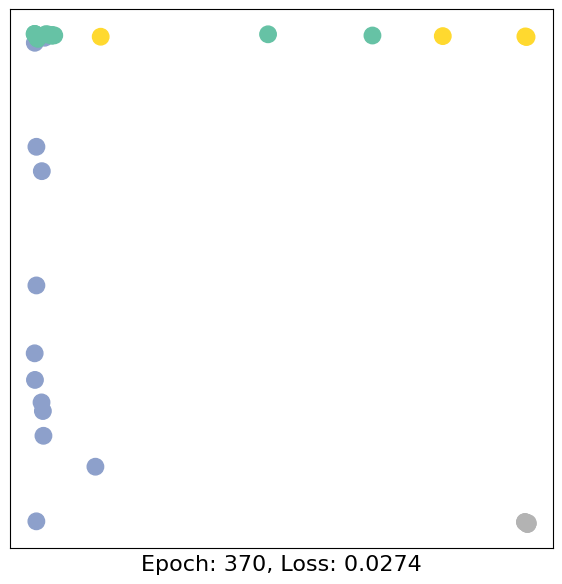

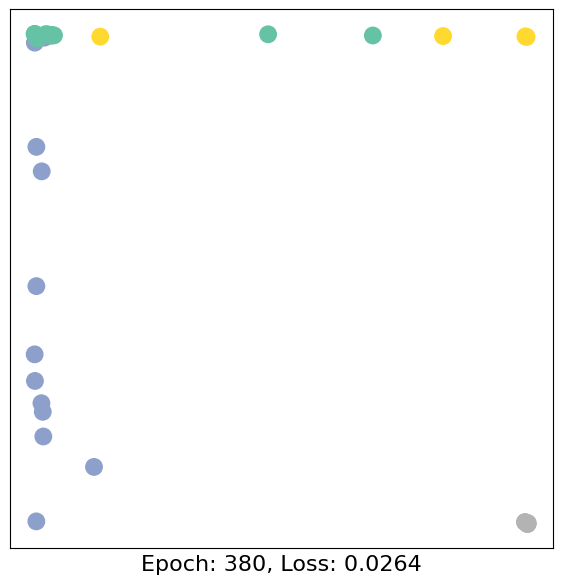

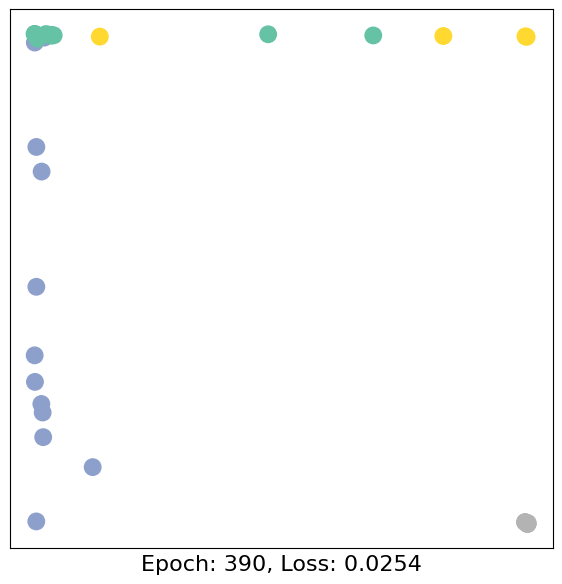

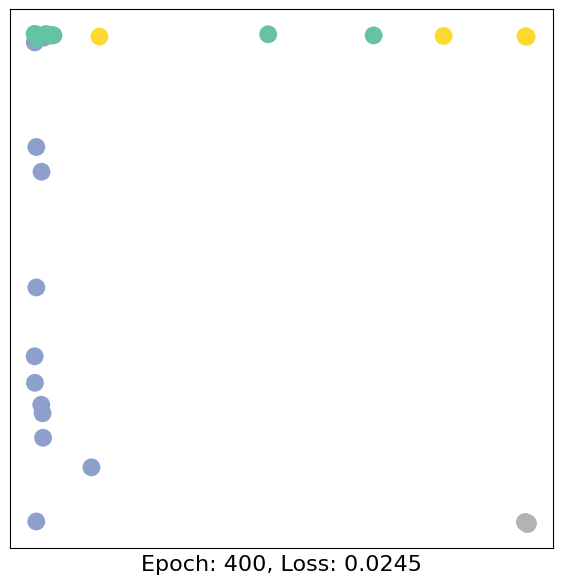

In [17]:
def train(data: Data):
    model.train()
    optimizer.zero_grad()
    out, h = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss, h

data = dataset[0]
for epoch in range(401):
    loss, h = train(dataset[0])
    if epoch % 10 == 0:
        visualize_embedding(h,  color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)